In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

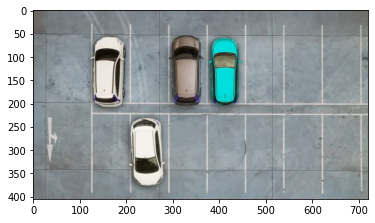

In [36]:
# Load image
img = cv2.imread('parking_space.webp')

# Show the image
plt.imshow(img)
plt.show()

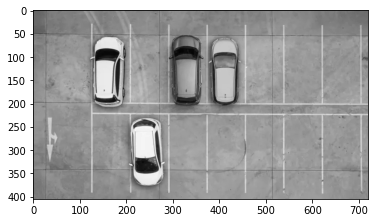

In [37]:
# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Show the image
plt.imshow(img_gray, cmap='gray')
plt.show()

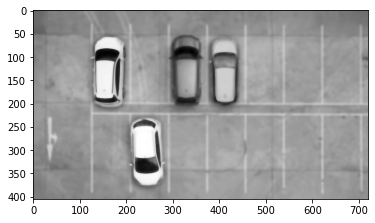

In [38]:
# Blur image
img_blurred = cv2.GaussianBlur(img_gray, (7, 7), 0)
img_blurred2 = cv2.medianBlur(img_gray, 5)
img_blurred3 = cv2.bilateralFilter(img_gray, 9, 75, 75)

# Show the image
plt.imshow(img_blurred3, cmap='gray')
plt.show()

In [39]:
# # Detect edges on the image
# edges = cv2.Canny(img, 50, 150, apertureSize=3)

# # Detects lines on the image
# lines = []
# hough_lines = cv2.HoughLinesP(edges,
#                               1,
#                               np.pi/180,
#                               threshold=100,
#                               minLineLength=5,
#                               maxLineGap=50)

# for points in hough_lines:
#   x1, y1, x2, y2 = points[0]
  
#   cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  
#   lines.append(((x1, y1), (x2, y2)))
  
# # Show the image
# plt.imshow(img)
# plt.show()

In [40]:
import json

with open('parking_space.json') as f:
  mask = json.load(f)
  
pts_list = [mask_shape['points'] for mask_shape in mask['shapes']]
pts_list = np.array(pts_list, np.int32)
pts_list

array([[[ 27,  50],
        [125,  52],
        [124, 199],
        [ 27, 197]],

       [[126,  51],
        [211,  53],
        [208, 200],
        [124, 200]],

       [[211,  52],
        [291,  53],
        [292, 200],
        [208, 200]],

       [[292,  53],
        [374,  54],
        [374, 201],
        [292, 200]],

       [[375,  54],
        [457,  54],
        [457, 201],
        [375, 201]],

       [[458,  54],
        [540,  55],
        [540, 201],
        [458, 200]],

       [[540,  55],
        [540, 201],
        [623, 202],
        [621,  55]],

       [[622,  55],
        [705,  55],
        [705, 202],
        [624, 202]]], dtype=int32)

In [41]:
# cv2.polylines(img, pts, True, (0, 255, 0), 2)

# # # Show the image
# plt.imshow(img)
# plt.show()

In [42]:
def check_parking_space(img_processed):
  space_count = 0
  
  for pts in pts_list:
    # img_cropped = img_processed
    
    mask = np.zeros(img_processed.shape[0:2], dtype=np.uint8)
    
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    
    res = cv2.bitwise_and(img_processed, img_processed, mask=mask)
    rect = cv2.boundingRect(pts)
    cropped = res[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
    wbg = np.ones_like(img_processed, np.uint8)
    cv2.bitwise_not(wbg, wbg, mask=mask)
    dst = wbg+res
    
    cv2.imshow('Cropped Image', cropped)
    cv2.waitKey(0)
    

In [43]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blurred = cv2.GaussianBlur(img_gray, (3, 3), 1)
img_thres = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 16)
img_median = cv2.medianBlur(img_thres, 5)
kernel = np.ones((3, 3), np.uint8)
img_dilated = cv2.dilate(img_median, kernel, iterations=1)

check_parking_space(img_dilated)

# Show the image
plt.imshow(img_dilated, cmap='gray')
plt.show()